In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# main json file >>> /kaggle/input/wlasl-processed/WLASL_v0.3.json

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
main_path = 'C:/Users/a882436/Documents/M2 DS/datacamp/WLAS/'
wlas_df = pd.read_json(main_path+'WLASL_v0.3.json')

In [7]:
wlas_df.head()

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."


In [21]:
wlas_df['gloss']

0             book
1            drink
2         computer
3           before
4            chair
           ...    
1995    washington
1996     waterfall
1997         weigh
1998    wheelchair
1999       whistle
Name: gloss, Length: 2000, dtype: object

### 2000 different words in the gloss

In [22]:
wlas_df['count_vid'] = wlas_df['instances'].apply(len)
wlas_df

,gloss,instances,count_vid
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...",40
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...",35
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",30
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26
...,...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...",7


### For each word in the gloss, we have different number of videos. The wlas_df is sorted based on the number of videos available for each word.

However, all videos are not available in the dataset, the following get_videos_ids function returns for each word the videos that are indeed available.

In [39]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [40]:
with open(main_path+'WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)

Let's check the number of available videos in the dataset for the first word 'book'.

In [41]:
len(get_videos_ids(instance_json[0]['instances']))

6

In [42]:
get_videos_ids(instance_json[0]['instances'])

['69241', '07069', '07068', '07070', '07099', '07074']

In [43]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [44]:
wlas_df

,gloss,instances,count_vid,videos_ids
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...",40,"[69241, 07069, 07068, 07070, 07099, 07074]"
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...",35,"[69302, 65539, 17710, 17733, 65540, 17734, 177..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",30,"[12328, 12312, 12311, 12338, 12313, 12314, 123..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26,"[05728, 05749, 05750, 05729, 05730, 65167, 057..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26,"[09848, 09869, 09849, 09850, 09851, 65328, 09854]"
...,...,...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62393, 62394, 62395, 62396, 62398]"
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62488, 62489, 62490, 62492, 62493]"
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62782, 62783, 62785]"
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...",7,"[63044, 63046, 63047, 63050]"


Json features

In [46]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    videos_urls = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
    return videos_ids, videos_urls

In [47]:
features_df = pd.DataFrame(columns=['gloss', 'video_id', 'url'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids, urls = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids, urls)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

C:\Users\a882436\AppData\Local\Temp\ipykernel_10952\40032862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(df, ignore_index=True)


In [48]:
features_df

,gloss,video_id,url
0,book,69241,http://aslbricks.org/New/ASL-Videos/book.mp4
1,book,07069,https://signstock.blob.core.windows.net/signsc...
2,book,07068,https://s3-us-west-1.amazonaws.com/files.start...
3,book,07070,https://media.asldeafined.com/vocabulary/14666...
4,book,07099,http://www.aslsearch.com/signs/videos/book.mp4
...,...,...,...
11975,wheelchair,63047,https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976,wheelchair,63050,http://www.aslsearch.com/signs/videos/wheelcha...
11977,whistle,63186,https://media.spreadthesign.com/video/mp4/13/9...
11978,whistle,63188,https://www.signingsavvy.com/signs/mp4/9/9961.mp4


In [50]:
features_df = pd.DataFrame(columns=['gloss', 'video_id', 'url'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids, urls = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids, urls)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

C:\Users\a882436\AppData\Local\Temp\ipykernel_10952\40032862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(df, ignore_index=True)


### Task dataframe

In [51]:
features_df.index.name = 'index'
features_df

,gloss,video_id,url
index,,,
0,book,69241,http://aslbricks.org/New/ASL-Videos/book.mp4
1,book,07069,https://signstock.blob.core.windows.net/signsc...
2,book,07068,https://s3-us-west-1.amazonaws.com/files.start...
3,book,07070,https://media.asldeafined.com/vocabulary/14666...
4,book,07099,http://www.aslsearch.com/signs/videos/book.mp4
...,...,...,...
11975,wheelchair,63047,https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976,wheelchair,63050,http://www.aslsearch.com/signs/videos/wheelcha...
11977,whistle,63186,https://media.spreadthesign.com/video/mp4/13/9...


### In this dataframe we have for each word, all the videos that are available. At total, we have 11980 videos in our dataset.

In [52]:
wlas_df['samples_num'] = wlas_df['videos_ids'].apply(len)

In [53]:
wlas_df

,gloss,instances,count_vid,videos_ids,samples_num
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...",40,"[69241, 07069, 07068, 07070, 07099, 07074]",6
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...",35,"[69302, 65539, 17710, 17733, 65540, 17734, 177...",15
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",30,"[12328, 12312, 12311, 12338, 12313, 12314, 123...",14
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26,"[05728, 05749, 05750, 05729, 05730, 65167, 057...",16
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",26,"[09848, 09869, 09849, 09850, 09851, 65328, 09854]",7
...,...,...,...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62393, 62394, 62395, 62396, 62398]",5
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62488, 62489, 62490, 62492, 62493]",5
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...",7,"[62782, 62783, 62785]",3
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...",7,"[63044, 63046, 63047, 63050]",4


In [54]:
print("minimum number of samples for a word:", wlas_df['samples_num'].min())
print("maximum number of samples for a word:", wlas_df['samples_num'].max())

minimum number of samples for a word: 2
maximum number of samples for a word: 16


In [55]:
words_sample_counts = wlas_df[['gloss', 'samples_num']].groupby('samples_num').agg({"gloss":['count', ', '.join]})

Here we have the number of samples that go from 2 to 16, and for each, the words that have this amount of samples in the dataset

In [57]:
words_sample_counts

gloss                                                   
            count                                               join
samples_num                                                         
2              14  gloves, careless, wash face, curtain, grey, la...
3              76  garage, parents, boots, excuse, furniture, rep...
4             335  hello, newspaper, asl, that, will, cards, hate...
5             511  clothes, table, movie, clock, pencil, behind, ...
6             402  book, birthday, need, have, knife, read, name,...
7             307  chair, dance, eat, forget, but, jacket, paint,...
8             151  all, blue, hearing, wrong, color, enjoy, time,...
9             100  fine, finish, now, can, hat, kiss, cow, meet, ...
10             48  year, black, hot, like, many, orange, fish, gr...
11             26  deaf, no, walk, mother, woman, dog, family, ap...
12             13  yes, what, later, man, shirt, change, corn, da...
13              8  candy, thanksgiving, bed, bowling, tall, accid...
14              4                        computer, who, cousin, help
15              2                                          drink, go
16              3                                 before, thin, cool

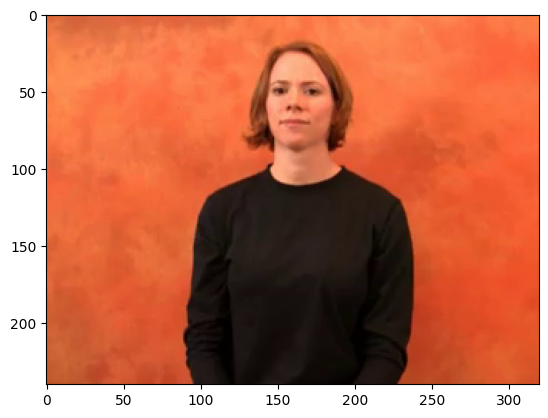

In [58]:
import cv2
import matplotlib.pyplot as plt

# Read the video file
cap = cv2.VideoCapture(main_path+'videos/00335.mp4')

# Initialize an empty list to store the frames
frames = []

# Loop through the video frames and append each frame to the list
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Convert the frame to RGB format
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

# Release the video capture object
cap.release()

# Display the first frame
plt.imshow(frames[0])
plt.show()


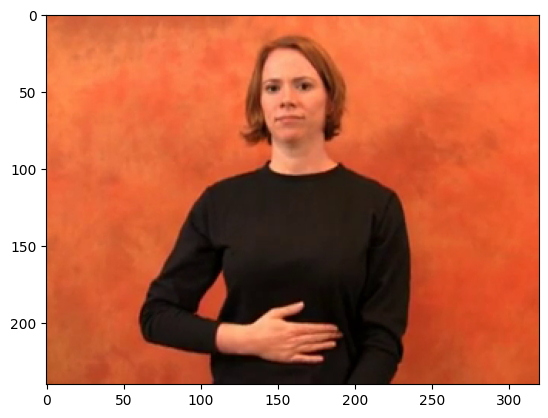

In [65]:
plt.imshow(frames[35])